케라스에 저장되어있는 미리 학습된 모델을 불러오고 사용하는 방법을 알아보겠습니다. weights=None 을 넣어주면 웨이트가 랜덤으로 초기화되고 weights='imagenet' 옵션을 주면 이미지넷 데이터로 학습된 웨이트가 불러와 집니다.

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50 as pre_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.applications.xception import Xception as pre_model
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

from tensorflow.keras.applications.vgg16 import VGG16 as pre_model
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

from tensorflow.keras.applications.vgg19 import VGG19 as pre_model
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

from tensorflow.keras.applications.inception_v3 import InceptionV3 as pre_model
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

model = pre_model(weights='imagenet')
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

preprocess_input 을 수행하면 입력 이미지도 변경이 되는것을 알 수 있습니다.

In [2]:
# pip install pillow
%matplotlib inline

import tensorflow.keras as keras
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

<class 'PIL.Image.Image'>


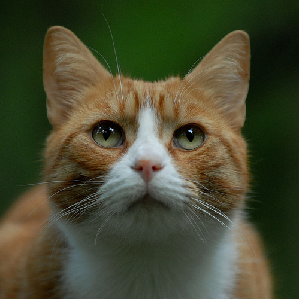

In [3]:
pil_img = keras.preprocessing.image.load_img('cat.jpg', target_size=(299, 299))

print(type(pil_img))

display(pil_img)

In [4]:
image = keras.preprocessing.image.img_to_array(pil_img)
print('image', image.shape, image.dtype)
print(image)

image (299, 299, 3) float32
[[[12. 25.  7.]
  [11. 24.  4.]
  [12. 25.  5.]
  ...
  [18. 34.  7.]
  [23. 39. 12.]
  [20. 36.  9.]]

 [[12. 25.  7.]
  [11. 24.  6.]
  [ 9. 22.  4.]
  ...
  [20. 36.  7.]
  [21. 35. 12.]
  [21. 35. 12.]]

 [[12. 25.  8.]
  [12. 25.  7.]
  [12. 25.  7.]
  ...
  [21. 35.  9.]
  [23. 37. 12.]
  [22. 36. 11.]]

 ...

 [[81. 66. 43.]
  [82. 70. 46.]
  [84. 69. 46.]
  ...
  [30. 45. 22.]
  [29. 44. 21.]
  [33. 47. 24.]]

 [[82. 66. 43.]
  [85. 69. 46.]
  [84. 68. 43.]
  ...
  [33. 47. 21.]
  [32. 46. 21.]
  [33. 47. 22.]]

 [[83. 65. 41.]
  [86. 70. 47.]
  [82. 67. 44.]
  ...
  [31. 47. 21.]
  [29. 45. 19.]
  [30. 44. 19.]]]


In [5]:
images = np.expand_dims(image, axis=0)
print('images', images.shape, images.dtype)
print(images)

images (1, 299, 299, 3) float32
[[[[12. 25.  7.]
   [11. 24.  4.]
   [12. 25.  5.]
   ...
   [18. 34.  7.]
   [23. 39. 12.]
   [20. 36.  9.]]

  [[12. 25.  7.]
   [11. 24.  6.]
   [ 9. 22.  4.]
   ...
   [20. 36.  7.]
   [21. 35. 12.]
   [21. 35. 12.]]

  [[12. 25.  8.]
   [12. 25.  7.]
   [12. 25.  7.]
   ...
   [21. 35.  9.]
   [23. 37. 12.]
   [22. 36. 11.]]

  ...

  [[81. 66. 43.]
   [82. 70. 46.]
   [84. 69. 46.]
   ...
   [30. 45. 22.]
   [29. 44. 21.]
   [33. 47. 24.]]

  [[82. 66. 43.]
   [85. 69. 46.]
   [84. 68. 43.]
   ...
   [33. 47. 21.]
   [32. 46. 21.]
   [33. 47. 22.]]

  [[83. 65. 41.]
   [86. 70. 47.]
   [82. 67. 44.]
   ...
   [31. 47. 21.]
   [29. 45. 19.]
   [30. 44. 19.]]]]


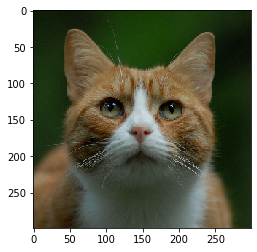

In [6]:
plt.imshow(images[0].astype('uint8'))
plt.show()

In [7]:
x = preprocess_input(images)

print('x', x.shape, x.dtype)
print(x)

x (1, 299, 299, 3) float32
[[[[-0.90588236 -0.8039216  -0.94509804]
   [-0.9137255  -0.8117647  -0.96862745]
   [-0.90588236 -0.8039216  -0.9607843 ]
   ...
   [-0.85882354 -0.73333335 -0.94509804]
   [-0.81960785 -0.69411767 -0.90588236]
   [-0.84313726 -0.7176471  -0.92941177]]

  [[-0.90588236 -0.8039216  -0.94509804]
   [-0.9137255  -0.8117647  -0.9529412 ]
   [-0.92941177 -0.827451   -0.96862745]
   ...
   [-0.84313726 -0.7176471  -0.94509804]
   [-0.8352941  -0.7254902  -0.90588236]
   [-0.8352941  -0.7254902  -0.90588236]]

  [[-0.90588236 -0.8039216  -0.9372549 ]
   [-0.90588236 -0.8039216  -0.94509804]
   [-0.90588236 -0.8039216  -0.94509804]
   ...
   [-0.8352941  -0.7254902  -0.92941177]
   [-0.81960785 -0.70980394 -0.90588236]
   [-0.827451   -0.7176471  -0.9137255 ]]

  ...

  [[-0.36470586 -0.4823529  -0.6627451 ]
   [-0.35686272 -0.45098037 -0.6392157 ]
   [-0.34117645 -0.4588235  -0.6392157 ]
   ...
   [-0.7647059  -0.64705884 -0.827451  ]
   [-0.77254903 -0.654902   -0

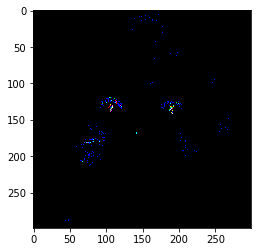

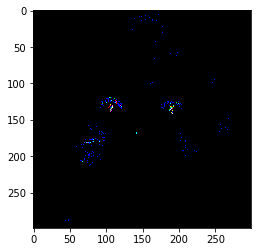

In [8]:
plt.imshow(images[0].astype('uint8'))
plt.show()
plt.imshow(x[0].astype('uint8'))
plt.show()

In [9]:
pred = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
print('prediction')
print(decode_predictions(pred, top=3))

prediction
40960/35363 [==================================] - 0s 1us/step
[[('n02123045', 'tabby', 0.30431667), ('n02123159', 'tiger_cat', 0.29704612), ('n02124075', 'Egyptian_cat', 0.21344033)]]
